In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import xlsxwriter
import matplotlib.pyplot as plt
import seaborn as sns
import time
import csv
from datetime import datetime

In [2]:
USER_AGENT = "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:86.0) Gecko/20100101 Firefox/86.0"
headers = {"user-agent": USER_AGENT}

In [3]:
# Scraping de l'agregador Meneame

titular = []
web = []
usuari = []
meneos = []
clics = []
comentaris = []
v_positius = []
v_anonims = []
v_negatius = []
sub = []
karma = []
created = []

# Fem scraping a meneame.net de la portada i les 9 portades anteriors.

for counter in range(1,11):
    URL = "https://www.meneame.net/?page="+str(counter)
    page = requests.get(URL, headers=headers)
    meneame = page.content
    soup = BeautifulSoup(meneame,"html.parser")
    # Scraping de: Titular - Web - Usuari
    for i in soup.find_all('div',{'class':'center-content'}):
        noticia = i.find('a')
        t = noticia.string
        w = noticia['href']
        u_usuari = noticia.find_next('a')['href']
        u = u_usuari.split('/')[2]
        titular.append(t)
        web.append(w)
        usuari.append(u)
    # Scraping de: Meneos
    for i in soup.find_all('div',{'class':'votes'}):
        noticia_m = i.find('a')
        if noticia_m != None:
            m = noticia_m.string
            meneos.append(m)
    # Scraping de: Clics   
    for i in soup.find_all('div',{'class':'clics'}):
        c = i.find('span').string
        if c != None:
            clics.append(c)
    # Scraping de: Comentaris
    for i in soup.find_all('div',{'class':'news-details-main'}):
        com = i.find('a')['data-comments-number']
        comentaris.append(com)
    # Scraping de: Vots positius - Vots anónims - Vots negatius - Sub - Karma
    for i in soup.find_all('div',{'class':'news-details-data-up'}):
        x = i.find_all('span')
        v_positius.append(x[2].string)
        v_anonims.append(x[5].string)
        v_negatius.append(x[8].string)
        karma.append(x[12].string)
        sub.append(x[13].a.string)
    # Scraping de: Data de creació
    for i in soup.find_all('div',{'class':'news-submitted'}):
        x = str(i.find_all('span',{'class':'ts visible'})[0])
        z = int(x.split('=')[2].split(' ')[0].replace('"',''))
        c = datetime.fromtimestamp(z)
        created.append(c)

In [4]:
# Creem el csv
n = datetime.now()
ara = n.strftime("%d_%m_%y_%H_%M_")
csv_name = 'MenScraping_'+ara+'.csv'
meneame_file = open(csv_name, mode='w')
meneame_writer = csv.writer(meneame_file, delimiter=',')

In [5]:
# Escrivim les dades al csv i el tanquem
meneame_writer.writerow(['ID','Titular','Data Creació','Web','Usuari','Meneos','Clics','Comentaris','Vots Positius','Vots Anònims','Vots Negatius','Sub','Karma'])
for i in range(len(titular)):
    meneame_writer.writerow([i, titular[i], created[i], web[i],usuari[i],meneos[i],clics[i],comentaris[i],v_positius[i],v_anonims[i],v_negatius[i],sub[i],karma[i]])
meneame_file.close()

In [6]:
# Convertim el fitxer csv en datagrama per a obtenir gràfiques
menDF= pd.read_csv(csv_name)
menDF.head()

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
0,0,Las insignias de los campos de concentración ...,2021-04-12 08:58:46,https://www.curistoria.com/2021/04/las-insigni...,ccguy,67,1542,17,52,15,0,actualidad,475
1,1,"La ansiedad está en tu cuerpo, no en tu mente...",2021-04-12 02:04:47,https://elemental.medium.com/anxiety-is-in-you...,Remenad0r,84,1430,13,55,29,0,ciencia,428
2,2,Rusia creará la primera unidad de robots de c...,2021-04-11 23:12:57,http://charly015.blogspot.com/2021/04/rusia-cr...,me_joneo_pensando_en_ti,73,1186,56,48,25,2,actualidad,376
3,3,TVE se convierte en altavoz de las fake news ...,2021-04-11 18:27:52,https://vertele.eldiario.es/noticias/tve-altav...,dmeijide,345,1540,45,177,168,44,actualidad,386
4,4,Francia aprueba prohibir los vuelos doméstico...,2021-04-12 03:38:00,https://www.reuters.com/article/us-climate-cha...,Ñbrevu,372,742,122,192,180,1,actualidad,420


In [7]:
# Definim columnes del datagrama per a gràfiques tipus scatter
meneos=menDF['Meneos']
clics=menDF['Clics']
comen=menDF['Comentaris']
vmas=menDF['Vots Positius']
vmen=menDF['Vots Negatius']
vanon=menDF['Vots Anònims']
karma=menDF['Karma']

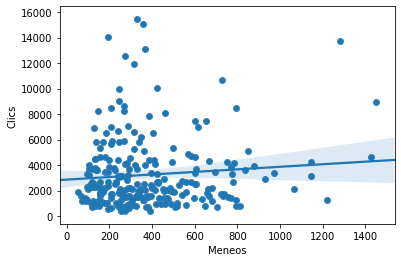

In [8]:
# Analitzem les correlacions entre variables numèriques:
sns.scatterplot(x=meneos,y=clics)
sns.regplot(x=meneos, y=clics, data=menDF);
plt.show()

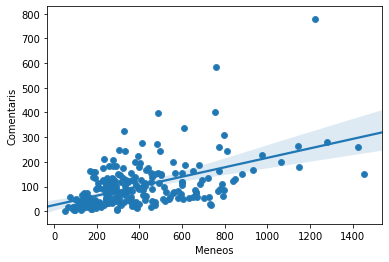

In [9]:
sns.scatterplot(x=meneos,y=comen)
sns.regplot(x=meneos, y=comen, data=menDF);
plt.show()

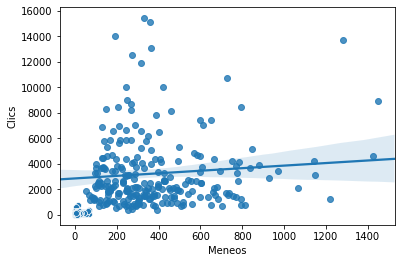

In [10]:
# Els vots negatius no es molesten en fer comentaris: no estan correlacionats
sns.scatterplot(x=vmen,y=comen)
sns.regplot(x=meneos, y=clics, data=menDF);
plt.show()

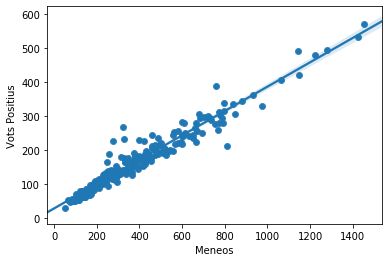

In [11]:
# Els vots anònims i els vots positius estan correlacionats:
sns.scatterplot(x=meneos,y=vmas)
sns.regplot(x=meneos, y=vmas, data=menDF);
plt.show()

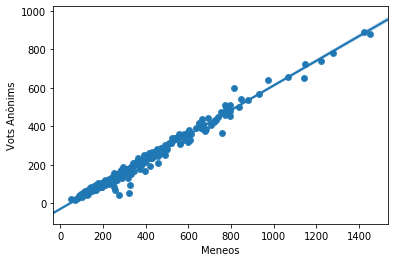

In [12]:
# Els vots anònims i els 'meneos' estan correlacionats:
sns.scatterplot(x=meneos,y=vanon)
sns.regplot(x=meneos, y=vanon, data=menDF);
plt.show()

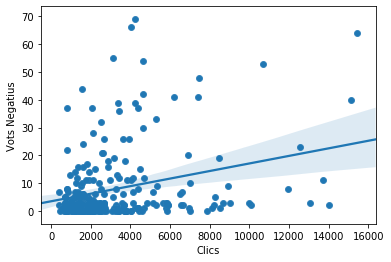

In [13]:
# Pocs clics voten negativament
sns.scatterplot(x=clics,y=vmen)
sns.regplot(x=clics, y=vmen, data=menDF);
plt.show()

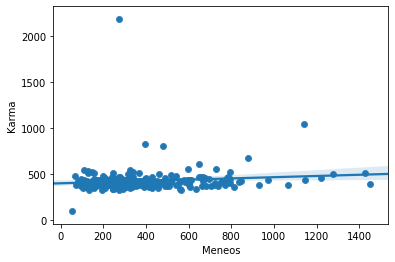

In [14]:
# No hi ha correlació entre el karma de la notícia i els meneos 
sns.scatterplot(x=meneos,y=karma)
sns.regplot(x=meneos, y=karma, data=menDF);
plt.show()

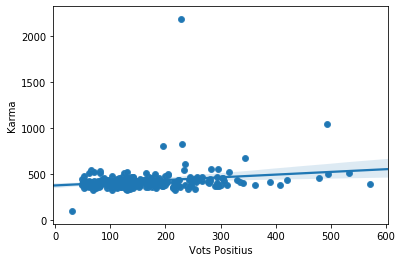

In [15]:
#  Tampoc hi ha correlació entre el karma de la notícia i els vots positius
sns.scatterplot(x=vmas,y=karma)
sns.regplot(x=vmas, y=karma, data=menDF);
plt.show()

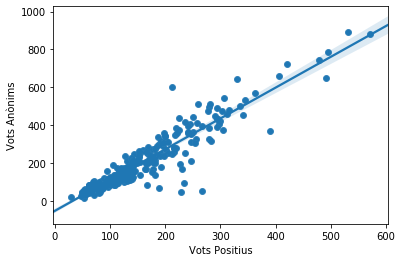

In [16]:
# Els vots anònims i els vots positius estan correlacionats:
sns.scatterplot(x=vmas,y=vanon)
sns.regplot(x=vmas, y=vanon, data=menDF);
plt.show()

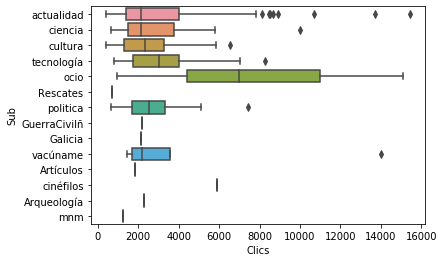

In [17]:
# Anàlisi per variables categòriques:
cat=menDF['Sub']
usuari=menDF['Usuari']

# Quines categories reben més clics (segueixen l'enllaç per llegir la notícia)?
# Hi ha outliers?
sns.boxplot(x=clics,y=cat)
plt.show()

In [18]:
# Qui rep màxim de clics.
mx=max(clics)
menDF[menDF['Clics']>=mx]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
194,194,Lo que ha pasado esta tarde en Vallecas resum...,2021-04-07 23:23:51,https://twitter.com/spanishrevorg/status/13798...,Álvaro91,328,15450,323,234,94,64,actualidad,546


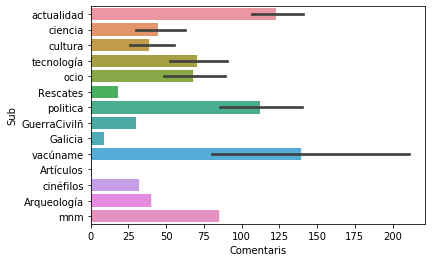

In [19]:
# Quin tema és el què rep més comentaris?
sns.barplot(x=comen,y=cat)
plt.show()

In [20]:
# Qui és  l'usuari que rep, en la mitjana, més comentaris?
import numpy as np
grouped = menDF.groupby('Usuari')
menDF[menDF['Comentaris']==max(grouped['Comentaris'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
129,129,Pablo Iglesias confirma que no se presentará ...,2021-04-09 10:16:24,https://www.20minutos.es/noticia/4649588/0/pab...,libtalker,757,1459,583,389,368,5,actualidad,413


In [21]:
# Qui és l'usuari que rep, en la mitjana, més meneos?
menDF[menDF['Meneos']==max(grouped['Meneos'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
163,163,Un agente antidisturbios lanza una piedra a l...,2021-04-08 16:30:35,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,1279,13725,282,495,784,11,actualidad,503


In [22]:
# Qui és l'usuari que rep, en la mitjana, més vots positius?
menDF[menDF['Vots Positius']==max(grouped['Vots Positius'].agg(np.mean))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
163,163,Un agente antidisturbios lanza una piedra a l...,2021-04-08 16:30:35,https://twitter.com/Miquel_R/status/1380161401...,nitsuga.blisset,1279,13725,282,495,784,11,actualidad,503


In [23]:
# Qui és l'usuari amb més karma:
# augmenta per resultats positius, et lleven per actitud negativa)?
menDF[menDF['Karma']==max(grouped['Karma'].agg(np.max))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
27,27,Rusia prohíbe definitivamente el matrimonio h...,2021-04-11 11:50:26,https://www.togayther.es/noticias/lgtbifobia/r...,baraja,274,718,183,228,46,5,politica,2183


In [24]:
# Qui és l'usuari que rep, en la mitjana, més vots negatius?
menDF[menDF['Vots Negatius']==max(grouped['Vots Negatius'].agg(np.max))]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
176,176,Santiago Abascal encuentra en Vallecas lo que...,2021-04-08 07:43:52,https://www.eldiario.es/politica/santiago-abas...,Llaqui,752,4225,400,277,475,69,actualidad,411


In [25]:
# Quina és la notícia què rep més vots negatius?
mx=max(vmen)
menDF[menDF['Vots Negatius']>=mx]

,ID,Titular,Data Creació,Web,Usuari,Meneos,Clics,Comentaris,Vots Positius,Vots Anònims,Vots Negatius,Sub,Karma
176,176,Santiago Abascal encuentra en Vallecas lo que...,2021-04-08 07:43:52,https://www.eldiario.es/politica/santiago-abas...,Llaqui,752,4225,400,277,475,69,actualidad,411


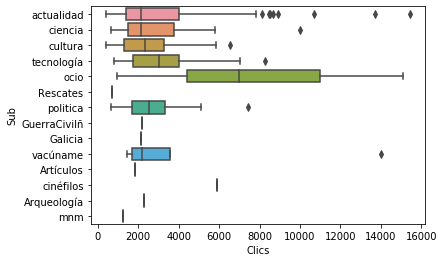

In [26]:
# En general, hi ha un fum d'outliers, potser perquè no és fàcil encaixar en una categoria l'aportació
# (o els outliers són la veritable notícia)
sns.boxplot(x=clics,y=cat)
plt.show()

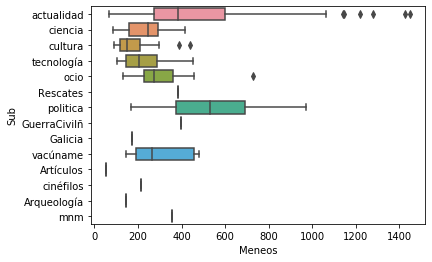

In [27]:
sns.boxplot(x=meneos,y=cat)
plt.show()

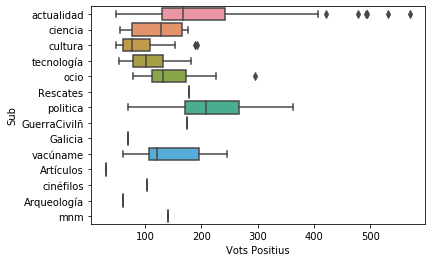

In [28]:
sns.boxplot(x=vmas,y=cat)
plt.show()

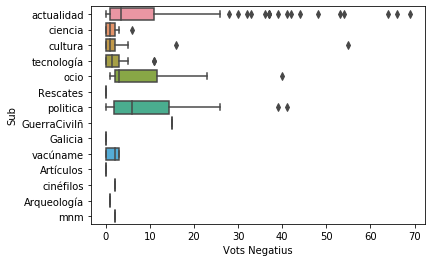

In [29]:
sns.boxplot(x=vmen,y=cat)
plt.show()

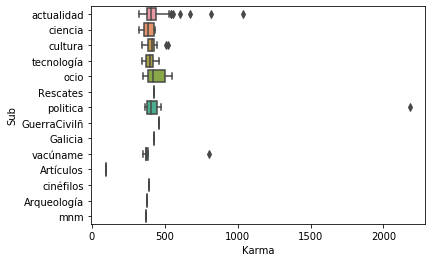

In [30]:
sns.boxplot(x=karma,y=cat)
plt.show()